In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import glob as gb

%matplotlib inline

# 1: Import training order_data

In [4]:
list_of_files = gb.glob('data/training_data/order_data/*.txt')

In [5]:
order_info = []
for f in list_of_files:
    order_info_single_day = pd.read_csv(f, delimiter = '\t', header = None)
    order_info.append(order_info_single_day)

In [6]:
order_info = pd.concat(order_info)
order_info[6] = pd.to_datetime(order_info[6])

In [7]:
order_info.columns = ['order_id', 'driver_id', 'passenger_id', \
                      'start_district_hash', 'dest_district_hash', 'price', 'time_stamp']
order_info.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,time_stamp
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01 22:13:27
4,139d492189ae5a933122c098f63252b3,NaN,26963cc76da2d8450d8f23fc357db987,fc34648599753c9e74ab238e9a4a07ad,87285a66236346350541b8815c5fae94,4.0,2016-01-01 17:00:06


In [8]:
order_id = order_info['order_id']
driver_id = order_info['driver_id']
passenger_id = order_info['passenger_id']
start_district_hash = order_info['start_district_hash']
dest_district_hash = order_info['dest_district_hash']
price = order_info['price']
time_stamp = order_info['time_stamp']

In [9]:
order_id_num = len(order_id)
order_id_num_unique = len(order_id.unique())
print ('total order_id:', order_id_num)
print ('unique order_id:', order_id_num_unique)

total order_id: 501287
unique order_id: 498789


In [69]:
driver_id_null = pd.isnull(driver_id)
driver_id_num = len(driver_id)
driver_id_num_unique = len(driver_id.unique())
driver_id_num_null = len(driver_id[driver_id_null])
print ('total driver_id:', driver_id_num)
print ('unique driver_id:', driver_id_num_unique)
print ('null driver_id:', driver_id_num_null)
print ('fraction of missed orders:', float(driver_id_num_null) / float(driver_id_num))
print ('fraction of received orders:', 1.0 - float(driver_id_num_null) / float(driver_id_num))

total driver_id: 501287
unique driver_id: 37661
null driver_id: 175710
fraction of missed orders: 0.3505177672670546
fraction of received orders: 0.6494822327329455


# 2: Import training cluster_map

In [10]:
path = 'data/training_data/cluster_map/cluster_map.txt'
cluster_map = {}

In [11]:
with open(path, 'r') as map_file:
    for line in map_file:
        hash_value, num = line.split()
        cluster_map[hash_value] = int(num)

In [22]:
dests = cluster_map.keys()
print(len(dests), 'destinations in total')

for hash_value in cluster_map:
    print(hash_value, cluster_map[hash_value])

66 destinations in total
<class 'dict_keys'>
825c426141df01d38c1b9e9c5330bdac 30
91690261186ae5bee8f83808ea1e4a01 20
52e56004d92b8c74d53e1e42699cba6f 26
3a43dcdff3c0b66b1acb1644ff055f9d 25
2407d482f0ffa22a947068f2551fe62c 28
08f5b445ec6b29deba62e6fd8b0325a6 43
ba32abfc048219e933bee869741da911 57
c9f855e3e13480aad0af64b418e810c3 45
dd8d3b9665536d6e05b29c2648c0e69a 11
c4ec24e0a58ebedaa1661e5c09e47bb5 54
90c5a34f06ac86aee0fd70e2adce7d8a 1
a735449c5c09df639c35a7d61fad3ee5 62
bf44d327f0232325c6d5280926d7b37d 64
693a21b16653871bbd455403da5412b4 39
a5609739c6b5c2719a3752327c5e33a7 19
87285a66236346350541b8815c5fae94 22
b26a240205c852804ff8758628c0a86a 4
fff4e8465d1e12621bc361276b6217cf 32
38d5ad2d22b61109fd8e7b43cd0e8901 24
d05052b4bda7662a084f235e880f50fa 36
1c60154546102e6525f68cb4f31e0657 56
4b9e4cf2fbdc8281b8a1f9f12b80ce4d 5
364bf755f9b270f0f9141d1a61de43ee 21
307afa4120c590b3a46cf4ff5415608a 16
52d7b69796362a8ed1691a6cc02ddde4 33
b05379ac3f9b7d99370d443cfd5dcc28 37
1afd7afbc81ecc1b13886a

# 3: Track missed riders

In [14]:
minute_wait = 15
minute_ignore = 60

t = np.arange(60 * minute_wait)  # track the first 15 minutes after an null order
missed_rider_being_picked_up = np.zeros(t.shape)

missed_rider_timestamp = {}
#key: missed rider's hash value
#value: the first time_stamp of an null order

real_null_rider = 0
real_unpicked_up_rider = 0
real_picked_up_rider = 0

percent = 25000

for i in range(int(order_id_num)):
    dri_id = driver_id.iloc[i]
    rid_id = passenger_id.iloc[i]
    tim_stp = time_stamp.iloc[i]
    if type(dri_id) == float and math.isnan(dri_id): # NULL rider
        if rid_id not in missed_rider_timestamp.keys():
            missed_rider_timestamp[rid_id] = time_stamp.iloc[i]
            real_null_rider += 1
        else:
            delta_time = time_stamp.iloc[i] - missed_rider_timestamp[rid_id]
            delta_second = int(delta_time.total_seconds())
            if delta_second > 60*minute_ignore:
                real_null_rider += 1
                real_unpicked_up_rider += 1
                missed_rider_timestamp[rid_id] = time_stamp.iloc[i]
    elif rid_id in missed_rider_timestamp.keys(): # Not null rider
        delta_time = time_stamp.iloc[i] - missed_rider_timestamp[rid_id]
        delta_second = int(delta_time.total_seconds())
        if delta_second < 60 * minute_wait and delta_second > 0:
            missed_rider_being_picked_up[delta_second] += 1
        else:
            real_unpicked_up_rider += 1
        missed_rider_timestamp.pop(rid_id, None)
    if i % percent == 0:
        print(i / float(order_id_num) * 100, '% finished')
        
real_unpicked_up_rider  += len(missed_rider_timestamp.keys())
real_picked_up_rider = int(np.sum(missed_rider_being_picked_up))

0.0 % finished
4.987163042329045 % finished
9.97432608465809 % finished
14.961489126987134 % finished
19.94865216931618 % finished
24.935815211645227 % finished
29.922978253974268 % finished
34.910141296303316 % finished
39.89730433863236 % finished
44.884467380961404 % finished
49.871630423290455 % finished
54.85879346561949 % finished
59.845956507948536 % finished
64.83311955027759 % finished
69.82028259260663 % finished
74.80744563493568 % finished
79.79460867726472 % finished
84.78177171959376 % finished
89.76893476192281 % finished
94.75609780425187 % finished
99.74326084658091 % finished


In [15]:
print('total unpicked up driver:', real_null_rider)
print('riders get a second chance:', \
      real_picked_up_rider, ',', real_picked_up_rider / real_null_rider)
print('riders do not get to be picked in the end:', \
      real_unpicked_up_rider, ',', real_unpicked_up_rider / real_null_rider)

total unpicked up driver: 98185
riders get a second chance: 9245 , 0.09415898558843
riders do not get to be picked in the end: 88940 , 0.90584101441157


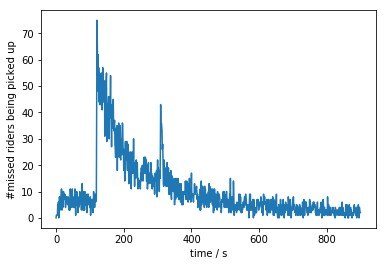

In [16]:
plt.plot(t,missed_rider_being_picked_up)
plt.xlabel('time / s')
plt.ylabel('#missed riders being picked up')
plt.show()

# Track out-of-town riders

In [55]:
out_of_town_rider = 0

for i in range(int(order_id_num)):
    des_hash = dest_district_hash.iloc[i]
    if des_hash not in cluster_map.keys():
        out_of_town_rider += 1
    if i % percent == 0:
        print(i / float(order_id_num) * 100, '% finished')

0.0 % finished
4.987163042329045 % finished
9.97432608465809 % finished
14.961489126987134 % finished
19.94865216931618 % finished
24.935815211645227 % finished
29.922978253974268 % finished
34.910141296303316 % finished
39.89730433863236 % finished
44.884467380961404 % finished
49.871630423290455 % finished
54.85879346561949 % finished
59.845956507948536 % finished
64.83311955027759 % finished
69.82028259260663 % finished
74.80744563493568 % finished
79.79460867726472 % finished
84.78177171959376 % finished
89.76893476192281 % finished
94.75609780425187 % finished
99.74326084658091 % finished


In [27]:
print('out_of_town_rider:', out_of_town_rider, out_of_town_rider / order_id_num)

out_of_town_rider: 93140 0.1858017463050109


# Get rid of missed drivers being picked up and out-of-town drivers

In [73]:
driver_to_clean = driver_id_null

In [74]:
minute_wait = 15
minute_ignore = 60

missed_rider_timestamp = {}
#key: missed rider's hash value
#value: the first time_stamp of an null order

missed_rider_former_order = {}
#key: missed rider's hash value
#value: former null order's row number from the same rider

real_null_rider = 0
real_unpicked_up_rider = 0
real_picked_up_rider = 0

percent = 25000

for i in range(int(order_id_num)):
    dri_id = driver_id.iloc[i]
    rid_id = passenger_id.iloc[i]
    tim_stp = time_stamp.iloc[i]
    des_hash = dest_district_hash.iloc[i]
    if des_hash not in cluster_map.keys():
        driver_to_clean.iloc[i] = True
        
    if type(dri_id) == float and math.isnan(dri_id): # NULL rider
        if rid_id not in missed_rider_timestamp.keys():
            missed_rider_timestamp[rid_id] = time_stamp.iloc[i]
            real_null_rider += 1
            missed_rider_former_order[rid_id] = i
        else:
            delta_time = time_stamp.iloc[i] - missed_rider_timestamp[rid_id]
            delta_second = int(delta_time.total_seconds())
            if delta_second > 60*minute_ignore:
                real_null_rider += 1
                real_unpicked_up_rider += 1
                missed_rider_timestamp[rid_id] = time_stamp.iloc[i]
                driver_to_clean.iloc[missed_rider_former_order[rid_id]] = False
                missed_rider_former_order[rid_id] = i
    elif rid_id in missed_rider_timestamp.keys(): # Not null rider
        delta_time = time_stamp.iloc[i] - missed_rider_timestamp[rid_id]
        delta_second = int(delta_time.total_seconds())
        if delta_second < 60 * minute_wait and delta_second > 0:
            missed_rider_being_picked_up[delta_second] += 1
        else:
            real_unpicked_up_rider += 1
        missed_rider_timestamp.pop(rid_id, None)
    if i % percent == 0:
        print(i / float(order_id_num) * 100, '% finished')
        
real_unpicked_up_rider  += len(missed_rider_timestamp.keys())
real_picked_up_rider = int(np.sum(missed_rider_being_picked_up))

0.0 % finished
4.987163042329045 % finished
9.97432608465809 % finished
14.961489126987134 % finished
19.94865216931618 % finished
24.935815211645227 % finished
29.922978253974268 % finished
34.910141296303316 % finished
39.89730433863236 % finished
44.884467380961404 % finished
49.871630423290455 % finished
54.85879346561949 % finished
59.845956507948536 % finished
64.83311955027759 % finished
69.82028259260663 % finished
74.80744563493568 % finished
79.79460867726472 % finished
84.78177171959376 % finished
89.76893476192281 % finished
94.75609780425187 % finished
99.74326084658091 % finished


In [77]:
print('total orders:', order_id_num)
print('out-of-town orders:', out_of_town_rider)
print('null orders:', driver_id_num_null)

total orders: 501287
out-of-town orders: 93140
null orders: 175710


In [78]:
print('real to-clean orders:', len(order_info[driver_to_clean]))

real to-clean orders: 231373


In [84]:
order_info_cleaned = order_info[~driver_to_clean]

In [86]:
print(len(order_info_cleaned))

269914


In [87]:
order_info_cleaned.head()

,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,time_stamp
0,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23
1,92c3ac9251cc9b5aab90b114a1e363be,c077e0297639edcb1df6189e8cda2c3d,191a180f0a262aff3267775c4fac8972,82cc4851f9e4faa4e54309f8bb73fd7c,b05379ac3f9b7d99370d443cfd5dcc28,2.0,2016-01-01 09:47:54
2,abeefc3e2aec952468e2fd42a1649640,86dbc1b68de435957c61b5a523854b69,7029e813bb3de8cc73a8615e2785070c,fff4e8465d1e12621bc361276b6217cf,fff4e8465d1e12621bc361276b6217cf,9.0,2016-01-01 18:24:02
3,cb31d0be64cda3cc66b46617bf49a05c,4fadfa6eeaa694742de036dddf02b0c4,21dc133ac68e4c07803d1c2f48988a83,4b7f6f4e2bf237b6cc58f57142bea5c0,4b7f6f4e2bf237b6cc58f57142bea5c0,11.0,2016-01-01 22:13:27
6,17c1c85144ab532947c7ea724fdcc945,115ac9b23f00a2e6d8a3041e23469f41,2f206d28eb6d7daa6d058304c00782de,a5609739c6b5c2719a3752327c5e33a7,a5609739c6b5c2719a3752327c5e33a7,6.0,2016-01-01 17:34:33


In [88]:
order_info_cleaned.to_csv('data/training_order_data_cleaned.csv')